In [2]:
%matplotlib inline
import numpy as np
from StringIO import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
import time
import sys
import ROOT
from IPython.display import Image as Plot
sys.path.insert(0, '/Users/sdporzio/HighVoltageTask')
import HvPackages.probability as prob
from HvPackages.dataFunctions import GetDateString as GDS
from HvPackages.dataFunctions import GetTimeString as GTS
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
ROOT.gStyle.SetOptStat(0)
ROOT.gROOT.ForceStyle()

def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

# Good fit
g_xres = 950
g_yres = 425

In [3]:
dataPmt = np.genfromtxt("Timestamps/pmtHitsFromTorScopeMon.dat",delimiter=" ",names=True,dtype=None)
dataHv = np.genfromtxt("Timestamps/hvBlipsFromData.dat",delimiter=" ",names=True,dtype=None)
toRemove = []
preCutData = len(dataPmt)
print "Available data: ", preCutData
for i,timestamp in enumerate(dataPmt["Timestamp"]):
    if timestamp==0.:
        toRemove.append(i)
for i,row in enumerate(toRemove):
    dataPmt = np.delete(dataPmt,row-i,0)
print "Data eliminated: ", preCutData - len(dataPmt)

Available data:  19396
Data eliminated:  2


In [69]:
j = 0
for cutY in np.arange(-200,0,2):
    startTime = ROOT.TDatime(2015,10,01,00,00,00).Convert()
    weekTime = 604800
    nWeeks = 20
    nDays = nWeeks*7
    daysPerBin = 7
    endTime = startTime + weekTime*nWeeks
    ROOT.gStyle.SetOptStat(1)

    c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
    h1 = ROOT.TH1D("hNumberPmt","Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
    h2 = ROOT.TH1D("hNumberHv","Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
    timeDivisions = int(nWeeks/4) + 4*100
    h1.SetLineColor(ROOT.kRed)
    h1.GetXaxis().SetTimeDisplay(1)
    h1.GetXaxis().SetNdivisions(timeDivisions,0)
    h2.SetLineColor(ROOT.kBlue)
    h2.GetXaxis().SetTimeDisplay(1)
    h2.GetXaxis().SetNdivisions(timeDivisions,0)

    for (i,timestamp) in enumerate(dataPmt["Timestamp"]):
        if dataPmt["MinY1"][i] < cutY and dataPmt["MinY2"][i] < cutY \
        and dataPmt["MinY3"][i] < cutY and dataPmt["MinY4"][i] < cutY: 
            h1.Fill(timestamp)

    for (i,timestamp) in enumerate(dataHv["Timestamp"]):
        h2.Fill(timestamp)

    h1.SetStats(0)
    h1.SetMaximum(100);

    h1.Draw("")
    h2.Draw("SAME")

    leg = ROOT.TLegend(0.68,0.68,0.88,0.88);
    leg.AddEntry(h2, "HV Events", "l");
    leg.AddEntry(h1, "PMT Events", "l");
    leg.Draw()

    paveText = ROOT.TPaveText(0.18,0.65,0.38,0.85,"NDC")
    lineCut = "CutY: %i" %(cutY)
    lineHV = "HV events: %i" %(h2.GetEntries())
    linePMT = "PMT events: %i" %(h1.GetEntries())
    paveText.AddText(lineCut)
    paveText.AddText(lineHV)
    paveText.AddText(linePMT)
    paveText.Draw()


    outName = "Plots/Pmts/histo%.02i.png" %j
    c1.SaveAs(outName)
    destruct(c1)
    destruct(h1)
    destruct(h2)
    destruct(leg)
    destruct(paveText)
    j+=1
#     print j

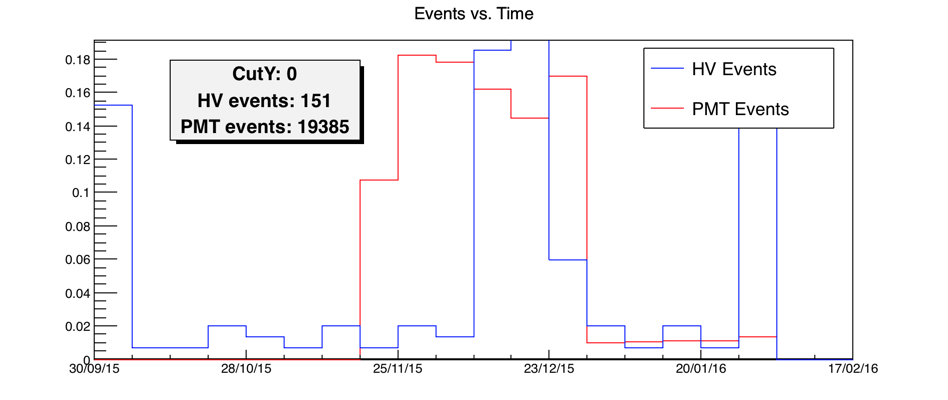

In [4]:
cutY = 0
startTime = ROOT.TDatime(2015,10,01,00,00,00).Convert()
weekTime = 604800
nWeeks = 20
nDays = nWeeks*7
daysPerBin = 7
endTime = startTime + weekTime*nWeeks
ROOT.gStyle.SetOptStat(1)

c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("hNumberPmt","Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
h2 = ROOT.TH1D("hNumberHv","Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
timeDivisions = int(nWeeks/4) + 4*100
h1.SetLineColor(ROOT.kRed)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h2.SetLineColor(ROOT.kBlue)
h2.GetXaxis().SetTimeDisplay(1)
h2.GetXaxis().SetNdivisions(timeDivisions,0)

for (i,timestamp) in enumerate(dataPmt["Timestamp"]):
    if dataPmt["MinY1"][i] < cutY and dataPmt["MinY2"][i] < cutY \
    and dataPmt["MinY3"][i] < cutY and dataPmt["MinY4"][i] < cutY: 
        h1.Fill(timestamp)

for (i,timestamp) in enumerate(dataHv["Timestamp"]):
    h2.Fill(timestamp)

h1.SetStats(0)
h1.DrawNormalized("")
h2.DrawNormalized("SAME")

leg = ROOT.TLegend(0.68,0.68,0.88,0.88);
leg.AddEntry(h2, "HV Events", "l");
leg.AddEntry(h1, "PMT Events", "l");
leg.Draw()

paveText = ROOT.TPaveText(0.18,0.65,0.38,0.85,"NDC")
lineCut = "CutY: %i" %(cutY)
lineHV = "HV events: %i" %(h2.GetEntries())
linePMT = "PMT events: %i" %(h1.GetEntries())
paveText.AddText(lineCut)
paveText.AddText(lineHV)
paveText.AddText(linePMT)
paveText.Draw()


outName = "Plots/Pmts/histoNorm.png"
c1.SaveAs(outName)
destruct(c1)
destruct(h1)
destruct(h2)
destruct(leg)
destruct(paveText)
Plot(outName)